# EDA Demographique

In [3]:
import polars as pl
import pyarrow.parquet as pq
import sys

filepath = "../Data/processed/sirene_infos.parquet" 

print("--- Début de la lecture 'bypass' ---")

try:
    print(f"Lecture du fichier via PyArrow : {filepath}")
    table_arrow = pq.read_table(
        filepath,
    )
    
    print("Conversion de la table PyArrow en DataFrame Polars...")
    df_demo = pl.from_arrow(table_arrow)
    
    print("--- SUCCÈS ! ---\n")
    print("Le DataFrame est maintenant dans Polars, prêt pour la transformation.")
    print(df_demo.head())

except Exception as e:
    print(f"\n--- ERREUR ---", file=sys.stderr)
    print(f"Impossible de lire le fichier, même avec PyArrow : {e}", file=sys.stderr)

--- Début de la lecture 'bypass' ---
Lecture du fichier via PyArrow : ../Data/processed/sirene_infos.parquet
Conversion de la table PyArrow en DataFrame Polars...
--- SUCCÈS ! ---

Le DataFrame est maintenant dans Polars, prêt pour la transformation.
shape: (5, 15)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ siren     ┆ dateCreat ┆ dateFerme ┆ is_failed ┆ … ┆ moisCreat ┆ departeme ┆ trancheEf ┆ caracter │
│ ---       ┆ ionUniteL ┆ ture      ┆ _in_3y    ┆   ┆ ion       ┆ nt        ┆ fectifsSi ┆ eEmploye │
│ str       ┆ egale     ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ege       ┆ urSiege  │
│           ┆ ---       ┆ date      ┆ i32       ┆   ┆ i8        ┆ str       ┆ ---       ┆ ---      │
│           ┆ date      ┆           ┆           ┆   ┆           ┆           ┆ str       ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 000325175 ┆ 2000-09-2 ┆ n

In [4]:
df_demo.schema

Schema([('siren', String),
        ('dateCreationUniteLegale', Date),
        ('dateFermeture', Date),
        ('is_failed_in_3y', Int32),
        ('categorieJuridiqueUniteLegale', Int64),
        ('trancheEffectifsUniteLegale', String),
        ('activitePrincipaleUniteLegale', String),
        ('categorieEntreprise', String),
        ('economieSocialeSolidaireUniteLegale', String),
        ('societeMissionUniteLegale', String),
        ('anneeCreation', Int32),
        ('moisCreation', Int8),
        ('departement', String),
        ('trancheEffectifsSiege', String),
        ('caractereEmployeurSiege', String)])

/var/folders/78/l_4xwnr90kd9z9r2bqrlqkqw0000gn/T/ipykernel_1591/12390573.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_failed_in_3y', data=df_demo, palette='viridis')


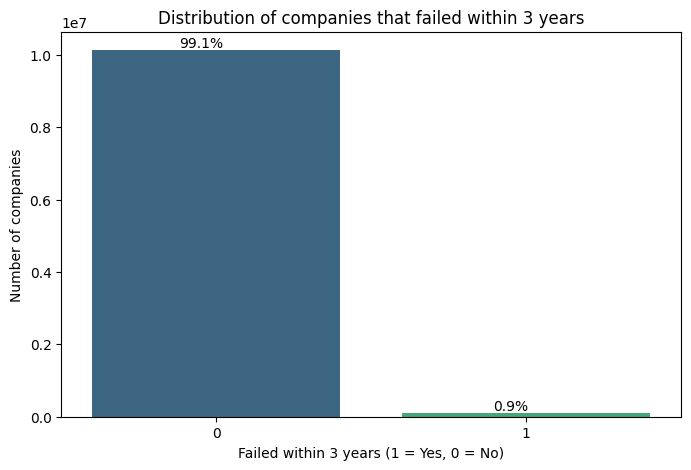

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution de la variable cible
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='is_failed_in_3y', data=df_demo, palette='viridis')

plt.title('Distribution of companies that failed within 3 years')
plt.xlabel('Failed within 3 years (1 = Yes, 0 = No)')
plt.ylabel('Number of companies')

# Ajouter les pourcentages sur les barres
total = len(df_demo)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show() 

---

# EDA Bilan

In [7]:
import polars as pl
import pyarrow.parquet as pq
import sys

filepath = "../Data/processed/sirene_bilan.parquet" 

print("--- Début de la lecture 'bypass' ---")

try:
    print(f"Lecture du fichier via PyArrow : {filepath}")
    table_arrow = pq.read_table(
        filepath,
    )
    
    print("Conversion de la table PyArrow en DataFrame Polars...")
    df_bilan = pl.from_arrow(table_arrow)
    
    print("--- SUCCÈS ! ---\n")
    print("Le DataFrame est maintenant dans Polars, prêt pour la transformation.")
    print(df_bilan.head())

except Exception as e:
    print(f"\n--- ERREUR ---", file=sys.stderr)
    print(f"Impossible de lire le fichier, même avec PyArrow : {e}", file=sys.stderr)

--- Début de la lecture 'bypass' ---
Lecture du fichier via PyArrow : ../Data/processed/sirene_bilan.parquet
Conversion de la table PyArrow en DataFrame Polars...
--- SUCCÈS ! ---

Le DataFrame est maintenant dans Polars, prêt pour la transformation.
shape: (5, 21)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ siren     ┆ date_clot ┆ CJCK_Tota ┆ EG_Impots ┆ … ┆ ratio_cap ┆ ratio_tre ┆ ratio_res ┆ ratio_re │
│ ---       ┆ ure_exerc ┆ lActifBru ┆ Taxes     ┆   ┆ itaux_pro ┆ sorerie   ┆ ultat_fin ┆ sultat_e │
│ str       ┆ ice       ┆ t         ┆ ---       ┆   ┆ pres      ┆ ---       ┆ ancier    ┆ xception │
│           ┆ ---       ┆ ---       ┆ i32       ┆   ┆ ---       ┆ f64       ┆ ---       ┆ nel      │
│           ┆ date      ┆ i32       ┆           ┆   ┆ f64       ┆           ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪══